<a href="https://colab.research.google.com/github/ahmad1jalal/Chest-X-Ray/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Pneumonia?**

Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.

# importing libraries....

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import random
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten, MaxPool2D,
import zipfile

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# unzip the data.....
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Chest-X-Ray-Data/archive.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
# getting the classes names...
data_dir = pathlib.Path("/content/chest_xray/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')

In [6]:
# let's make a function that will plot a random image....

def view_random_image(target_dir, target_class):
    
    target_folder = target_dir + "/" + target_class
    
    random_img = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + "/" + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Shape of the image : {img.shape}")
    
    return img

Shape of the image : (664, 896)


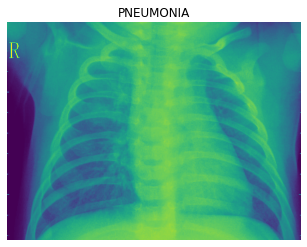

In [7]:
# view a random image from PNEUMONIA trainning data...
img = view_random_image("/content/chest_xray/train/","PNEUMONIA")

Shape of the image : (1291, 1654)


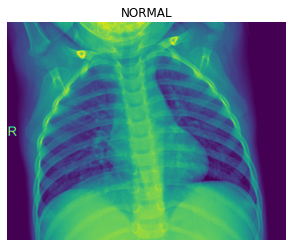

In [8]:
# view a normal image from the trainning data...
img = view_random_image("/content/chest_xray/train/","NORMAL")

In [9]:
img

array([[20, 22, 23, ...,  0,  0,  0],
       [19, 21, 21, ...,  0,  0,  0],
       [20, 20, 19, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [10]:
# shape of the image
img.shape

(1291, 1654)

In [11]:
# let's build our first model.....

# random seed
tf.random.set_seed(42)

# normalization get all values between 0 & 1.....
train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

# data directories...
train_dir = "/content/chest_xray/train/"
val_dir = "/content/chest_xray/test/"

# getting data from directories and turn it into batches....
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              seed = 42)

val_data = val_datagen.flow_from_directory(val_dir,
                                          target_size= (224,224),
                                          class_mode = "binary",
                                          batch_size = 32,
                                          seed = 42)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
# build our first model...
model_0 = Sequential(name="Model_0")

# adding our first conv2d layer
model_0.add(Conv2D(filters = 256, kernel_size = 3, activation= "relu", input_shape = (224,224,3)))

# adding 2nd conv2d layer
model_0.add(Conv2D(filters = 128, kernel_size = 3, activation= "relu", ))

# adding max pooling layer....
model_0.add(MaxPool2D(pool_size=(2,2)))

# adding more conv2d layer
model_0.add(Conv2D(filters = 64, kernel_size = 3, activation= "relu",))

model_0.add(Conv2D(filters = 32, kernel_size = 3, activation= "relu",))

# adding max pooling layer....
model_0.add(MaxPool2D(pool_size=(2,2)))

# adding the flatten layer...
model_0.add(Flatten())

# output layer...
model_0.add(Dense(1,activation = "sigmoid", ))

# compile the model
model_0.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [13]:
# fit the model.....
history_0 = model_0.fit(train_data,
                       epochs = 5,
                        steps_per_epoch = len(train_data),
                       validation_data = val_data,
                       validation_steps = len(val_data))

Epoch 1/5
163/163 [==============================] - 142s 770ms/step - loss: 0.4797 - accuracy: 0.8192 - val_loss: 0.3742 - val_accuracy: 0.8686
Epoch 2/5
163/163 [==============================] - 126s 769ms/step - loss: 0.1980 - accuracy: 0.9294 - val_loss: 0.5460 - val_accuracy: 0.8061
Epoch 3/5
163/163 [==============================] - 126s 770ms/step - loss: 0.1978 - accuracy: 0.9335 - val_loss: 0.5035 - val_accuracy: 0.8478
Epoch 4/5
163/163 [==============================] - 126s 768ms/step - loss: 0.1327 - accuracy: 0.9519 - val_loss: 0.8508 - val_accuracy: 0.8029
Epoch 5/5
163/163 [==============================] - 126s 770ms/step - loss: 0.1032 - accuracy: 0.9615 - val_loss: 0.7592 - val_accuracy: 0.7676


In [14]:
history_0.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
# let's make a function that will evaluate our model performance...

def plot_history(history):

  # loss
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  # accuracy....
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  # epochs......
  epochs = range(len(loss))

  # plotting the loss...
  plt.plot(epochs,loss,'go-',label="Training_Loss",linestyle = ":")
  plt.plot(epochs,val_loss,'ro-',label="Validation_Loss",linestyle = "-.")
  plt.title("Trainning vs Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.legend()
  plt.show()

  # plotting the accuracy...
  plt.figure()
  plt.plot(epochs,accuracy,'g-o',label="Training_Accuracy",linestyle = "-")
  plt.plot(epochs,val_accuracy,'r-o',label="Validation_Accuracy",linestyle = "--")
  plt.title("Trainning vs Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

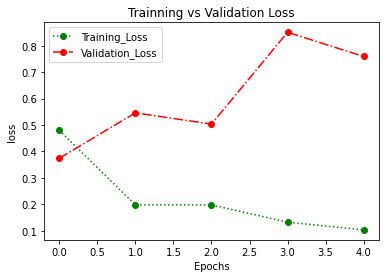

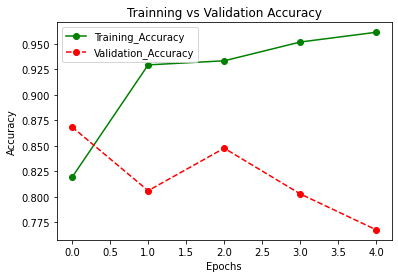

In [38]:
# plot the model_0 performance...
plot_history(history_0)

In [20]:
# let's implement data augmentation in order to make our model perform better....
train_data_aug = ImageDataGenerator(rescale = 1/255.,
                                    rotation_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip = True,
                                    )

# test data without augmentation...
test_aug = ImageDataGenerator(rescale = 1/255.)

# implement augmenatation to trainning data...

train_data_aug = train_data_aug.flow_from_directory(train_dir,
                                                    target_size = (224,224),
                                                    batch_size=32,
                                                    class_mode = "binary")

# test data without augmentation...
val_data = test_aug.flow_from_directory(val_dir,
                                        target_size = (224,224),
                                        class_mode = "binary",
                                        batch_size = 32,
                                        )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [31]:
# build the model on augmented data....

# build our first model...
model_1 = Sequential(name="Model_1")

# adding our first conv2d layer
model_1.add(Conv2D(filters = 256, kernel_size = 3, activation= "relu", input_shape = (224,224,3)))

# adding 2nd conv2d layer
model_1.add(Conv2D(filters = 128, kernel_size = 3, activation= "relu", ))


# adding max pooling layer....
model_1.add(MaxPool2D(pool_size=(2,2)))

# adding more conv2d layer
model_1.add(Conv2D(filters = 64, kernel_size = 3, activation= "relu",))

model_1.add(Conv2D(filters = 32, kernel_size = 3, activation= "relu",))

# adding max pooling layer....
model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# adding the flatten layer...
model_1.add(Flatten())

# output layer...
model_1.add(Dense(1,activation = "sigmoid", ))

# compile the model
model_1.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

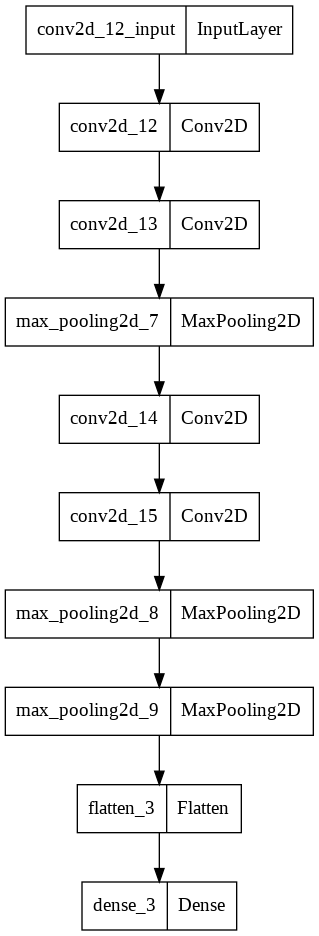

In [32]:
# plot the model...
tf.keras.utils.plot_model(model_1)

In [33]:
# fitting the model to data...
history_1 = model_1.fit(train_data_aug,
                        epochs = 10,
                        validation_data = val_data,)

Epoch 1/10
163/163 [==============================] - 145s 885ms/step - loss: 0.4708 - accuracy: 0.7680 - val_loss: 0.7357 - val_accuracy: 0.6026
Epoch 2/10
163/163 [==============================] - 142s 867ms/step - loss: 0.3789 - accuracy: 0.8275 - val_loss: 0.6135 - val_accuracy: 0.6635
Epoch 3/10
163/163 [==============================] - 141s 862ms/step - loss: 0.3461 - accuracy: 0.8464 - val_loss: 0.5849 - val_accuracy: 0.6907
Epoch 4/10
163/163 [==============================] - 139s 848ms/step - loss: 0.3095 - accuracy: 0.8723 - val_loss: 0.5198 - val_accuracy: 0.7115
Epoch 5/10
163/163 [==============================] - 137s 839ms/step - loss: 0.2651 - accuracy: 0.8884 - val_loss: 0.4820 - val_accuracy: 0.7340
Epoch 6/10
163/163 [==============================] - 142s 870ms/step - loss: 0.2446 - accuracy: 0.9028 - val_loss: 0.3791 - val_accuracy: 0.8365
Epoch 7/10
163/163 [==============================] - 138s 845ms/step - loss: 0.2217 - accuracy: 0.9105 - val_loss: 0.3789 -

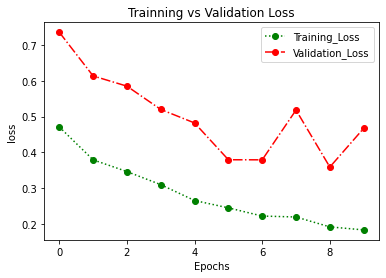

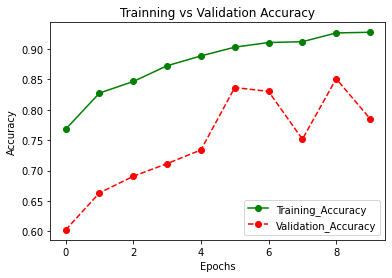

In [39]:
# plot the model performance......
plot_history(history_1)

In [47]:
# let's evaluate our model.....
model_1.evaluate(val_data)

20/20 [==============================] - 7s 328ms/step - loss: 0.4669 - accuracy: 0.7853


[0.4669075608253479, 0.7852563858032227]

In [48]:
# our model has achieved 78% accuracy.....